### Importing libraries

In [73]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [74]:
batch_size = 128
num_classes = 10 # output classes
epochs = 2 # going over full data 2 times

# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Each MNIST image is 28x28 pixels. Flattening into a 28x28 = 784 array.
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
print("Before converting class vectors: ", y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
print("After converting class vectors: ", y_train[0])
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples
Before converting class vectors:  5
After converting class vectors:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Part 1: Analysis of Activation Functions


### Try other Activation Functions
Analyze the accuracy and training time
#### Example Syntax 
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='relu'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Sigmoid Activation Function

In [75]:
# All layers come after another
%%time
model = Sequential()
# Dense: Fully connected layer, meaning all the neurons in a layer are connected to those in the next layer
# 64: Node number 
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) # Hidden layer 1
model.add(Dense(64, activation='sigmoid')) # Hidden layer 2
model.add(Dense(num_classes, activation='softmax')) # Output layer

# Shows number of params and output shape (50240 = 784*64 (weight) + 64 (bias))
model.summary()
# Optimizers find where loss is minimum
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1, # Loading bar of epoch visible
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_145 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_146 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.4149 - accuracy: 0.6584 - val_loss: 0.3342 - val_accuracy: 0.9104
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3061 - accuracy: 0.9137 - val_loss: 0.2338 - val_accuracy: 0.9309
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2274 - accuracy: 0.

### Relu Activation Function

In [76]:
%%time
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_148 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_149 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.6214 - accuracy: 0.8305 - val_loss: 0.1918 - val_accuracy: 0.9415
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1738 - accuracy: 0.9479 - val_loss: 0.1383 - val_accuracy: 0.9593
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1252 - accuracy: 0.

### Early Stopping


In [77]:
from keras.callbacks import Callback

class TerminateOnBaseline(Callback):

    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True
callbacks = TerminateOnBaseline(monitor='val_accuracy', baseline= score[1])

### Relu Activation Function with Early Stopping

In [78]:
# Write your code here 
%%time
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test), callbacks=[callbacks])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_151 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_152 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6010 - accuracy: 0.8367 - val_loss: 0.1974 - val_accuracy: 0.9407
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.9451 - val_loss: 0.1324 - val_accuracy: 0.9597
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1262 - accuracy: 0.

### Write your findings about activations here?

####Time Comparison
*   **Sigmoid:** CPU times: user 21.4 s, sys: 1.31 s, total: 22.7 s
      Wall time: 16.8 s
*   **Relu:** CPU times: user 22.1 s, sys: 1.45 s, total: 23.6 s
      Wall time: 17.5 s
*   **Relu with early stopping**: CPU times: user 11.3 s, sys: 745 ms, total: 12 s
Wall time: 8.92 s


####Loss and Accuracy Comparison
*   **Sigmoid:** Test loss: 0.10726623237133026
   <br> Test accuracy: 0.9672999978065491
*   **Relu:** Test loss: 0.08689840137958527
  <br> Test accuracy: 0.9742000102996826
 
1.  In order to make a time comparison, we must define a threshold value that both of them must exceed. Since we know the accuracy result without early stopping and the accuracy of the model which uses relu is higher we can assume that the threshold is equal to final accuracy result of the model which uses sigmoid. 

*   When we apply early stopping to relu we can make the conclusion that model using relu achieves the same accuracy in less time. One of the reason behind  is that the Relu's derivative is faster to compute.

2.   When we run the model without early stopping, we can see that the final accuracy of the relu model that already starts with higher accuracy than sigmoid is also higher. One of the reasons behind this is the non-saturation of Relu's gradient.

# Part 2: Design Choices: Nodes
#### Analyze the parameter size, accuracy and training time

### Design a model with small Number of Nodes. For Example 8

In [79]:
%%time
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 8)                 6280      
_________________________________________________________________
dense_154 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_155 (Dense)            (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 2ms/step - loss: 2.0464 - accuracy: 0.3532 - val_loss: 1.3340 - val_accuracy: 0.5527
Epoch 2/2
469/469 [==============================] - 1s 2ms/step - loss: 1.1887 - accuracy: 0.6251 - val_loss: 0.8858 - val_accuracy: 0.7209
Test loss: 0.8858238458633423
Test accuracy: 0.7208999991416931
CPU times: user 3.57 s, sys: 266 ms

Shape of First Layer (784, 8)
Visualization of First Layer


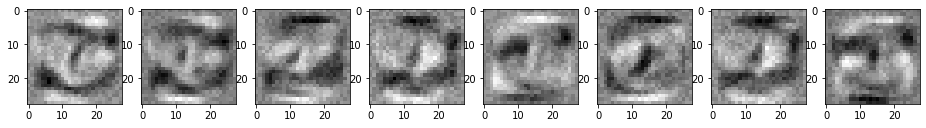

In [80]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer", layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with large Number of Nodes. For example 32

In [81]:
%%time
first_layer_size = 32

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_157 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_158 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.7711 - accuracy: 0.5127 - val_loss: 0.6864 - val_accuracy: 0.8392
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.5769 - accuracy: 0.8565 - val_loss: 0.3582 - val_accuracy: 0.9028
Test loss: 0.35817909240722656
Test accuracy: 0.9028000235557556
CPU times: user 4.2 s, sys: 281 

In [82]:
%%time
first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_160 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_161 (Dense)            (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 3s 5ms/step - loss: 1.4411 - accuracy: 0.6097 - val_loss: 0.3671 - val_accuracy: 0.9085
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.3311 - accuracy: 0.9136 - val_loss: 0.2378 - val_accuracy: 0.9320
Test loss: 0.2377506047487259
Test accuracy: 0.9319999814033508
CPU times: user 6.78 s, sys: 45

### Write your findings about influence of nodes here?

1.   As the number of nodes increases, the model becomes more complex (having more parameters to calculate) and the  number of mathematical operations also increases. As a result, the working time increases. 
2.   As the number of nodes increases accuracy also increases. Perhaps the model is starting to see features that it could not detect before.




# Part 3: Design Choices: Layers
#### Analyze the parameter size, accuracy and training time

### Design a model with small number of layers. For example 1 hidden layer

In [83]:
%%time
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_163 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7613 - accuracy: 0.7982 - val_loss: 0.2587 - val_accuracy: 0.9243
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2493 - accuracy: 0.9312 - val_loss: 0.2033 - val_accuracy: 0.9414
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1996 - accuracy: 0.9437 - val_loss: 0.1764 - val_accuracy: 0.9489
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1760 - ac

### Increase number of Layers. For example 4 hidden layers

In [84]:
%%time
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_165 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_166 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_167 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_168 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8340 - accuracy: 0.7512 - val_loss: 0.2

### Write your findings about influence of layers here?

1.   More layers means more parameters and calculations. Beacuse of that the working time increases.
2.   More layers allow us to get a more complex model. Thus, our accuracy value increases.